In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

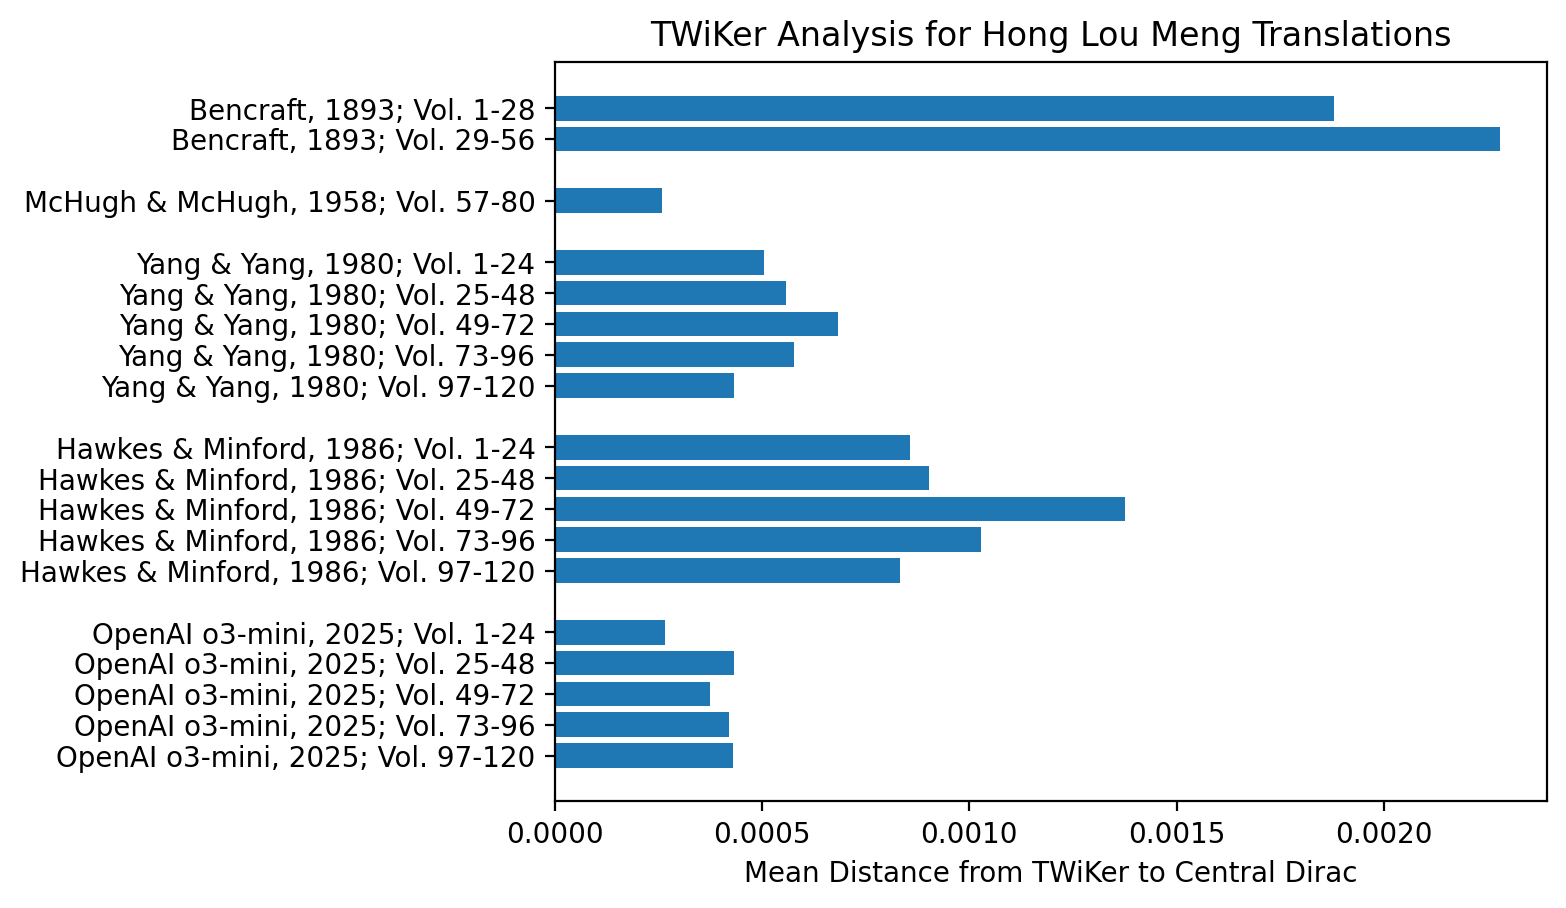

In [2]:
# Book dictionary
books = {
    "stone_B1_28": "Bencraft, 1893; Vol. 1-28",
    "stone_B29_56": "Bencraft, 1893; Vol. 29-56",
    "stone_F57_80": "McHugh & McHugh, 1958; Vol. 57-80",
    "stone_Y1_24": "Yang & Yang, 1980; Vol. 1-24",
    "stone_Y25_48": "Yang & Yang, 1980; Vol. 25-48",
    "stone_Y49_72": "Yang & Yang, 1980; Vol. 49-72",
    "stone_Y73_96": "Yang & Yang, 1980; Vol. 73-96",
    "stone_Y97_120": "Yang & Yang, 1980; Vol. 97-120",
    "stone_H1_24": "Hawkes & Minford, 1986; Vol. 1-24",
    "stone_H25_48": "Hawkes & Minford, 1986; Vol. 25-48",
    "stone_H49_72": "Hawkes & Minford, 1986; Vol. 49-72",
    "stone_H73_96": "Hawkes & Minford, 1986; Vol. 73-96",
    "stone_H97_120": "Hawkes & Minford, 1986; Vol. 97-120",
    "stone_G1_24": "OpenAI o3-mini, 2025; Vol. 1-24",
    "stone_G25_48": "OpenAI o3-mini, 2025; Vol. 25-48",
    "stone_G49_72": "OpenAI o3-mini, 2025; Vol. 49-72",
    "stone_G73_96": "OpenAI o3-mini, 2025; Vol. 73-96",
    "stone_G97_120": "OpenAI o3-mini, 2025; Vol. 97-120",
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

# Define groups
groups = [
    ["stone_B1_28", "stone_B29_56"],
    ["stone_F57_80"],
    ["stone_Y1_24", "stone_Y25_48", "stone_Y49_72", "stone_Y73_96", "stone_Y97_120"],
    ["stone_H1_24", "stone_H25_48", "stone_H49_72", "stone_H73_96", "stone_H97_120"],
    ["stone_G1_24", "stone_G25_48", "stone_G49_72", "stone_G73_96", "stone_G97_120"],
]

# Flatten for ordering
ordered_keys = [key for group in groups for key in group]
ordered_labels = [books[key] for key in ordered_keys]
ordered_values = [pos_dist_dict_book[key]["all"] for key in ordered_keys]

# Add spacing between groups
spaced_labels = []
spaced_values = []
group_spacer = 1  # Space between groups

pos = 0  # Current position
positions = []

for group in groups:
    for key in group:
        spaced_labels.append(books[key])
        spaced_values.append(pos_dist_dict_book[key]["all"])
        positions.append(pos)
        pos += 1  # Normal increment
    pos += group_spacer  # Add spacing after each group

# Plot
plt.figure(dpi=200)
plt.barh(positions, spaced_values, align="center")
plt.yticks(positions, spaced_labels)
plt.xlabel("Mean Distance from TWiKer to Central Dirac")
plt.title("TWiKer Analysis for Hong Lou Meng Translations")
plt.gca().invert_yaxis()
plt.savefig("results/figs/hongloumeng/all.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()

In [3]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, USA)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)",
}

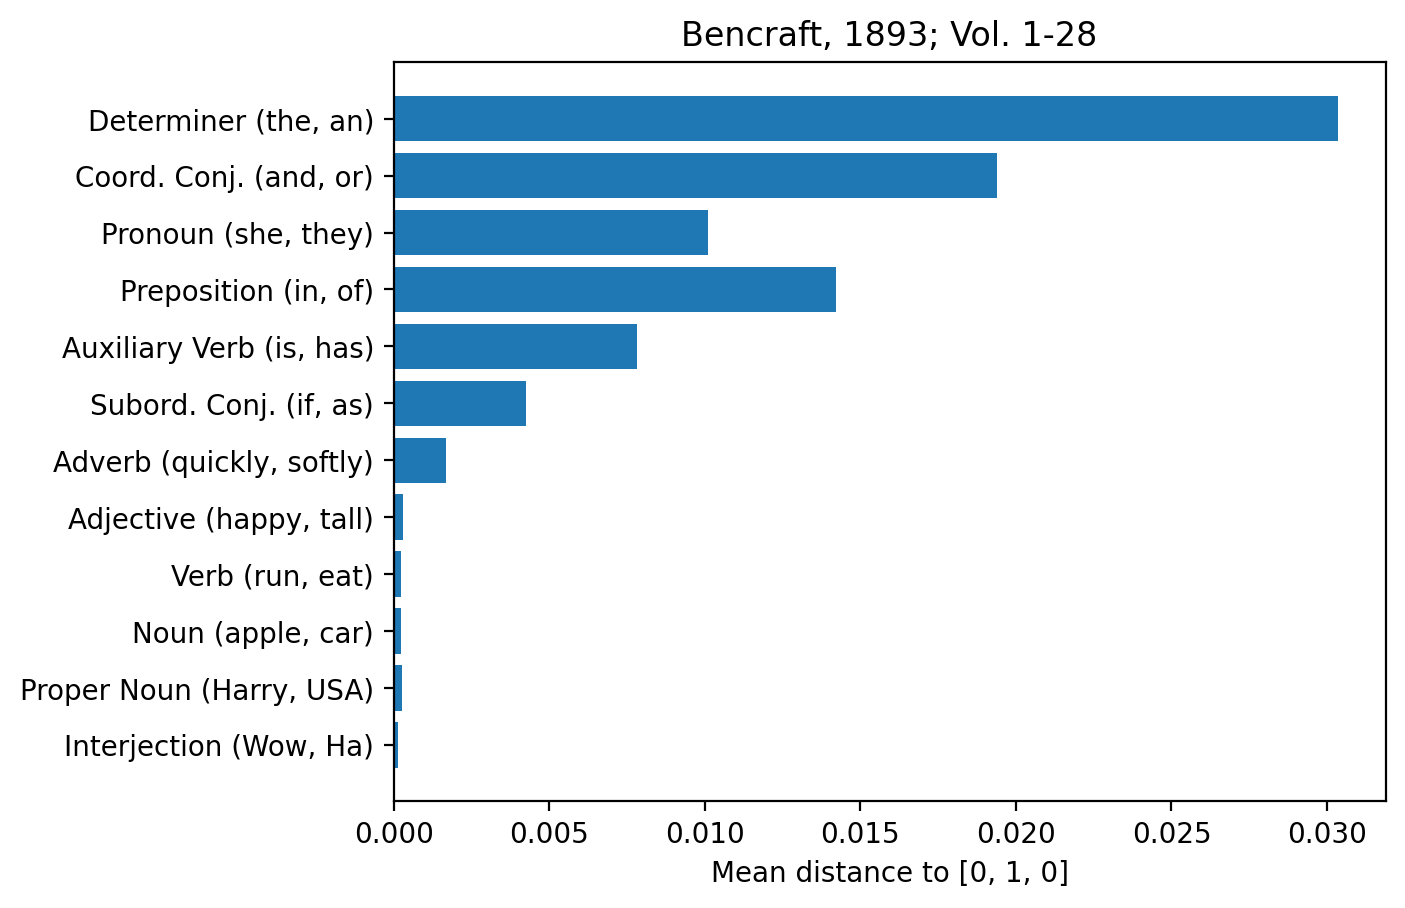

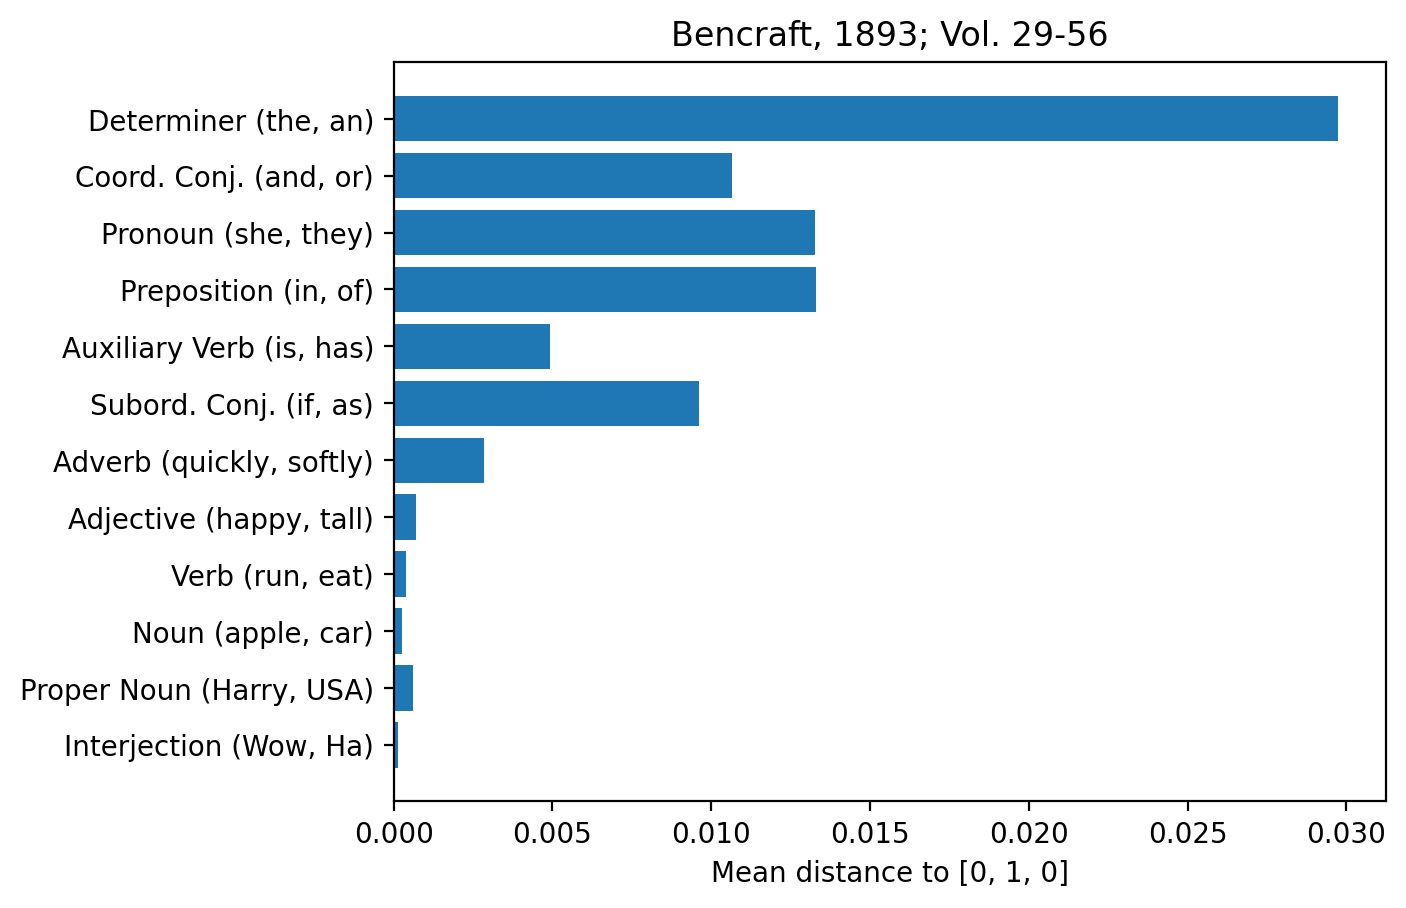

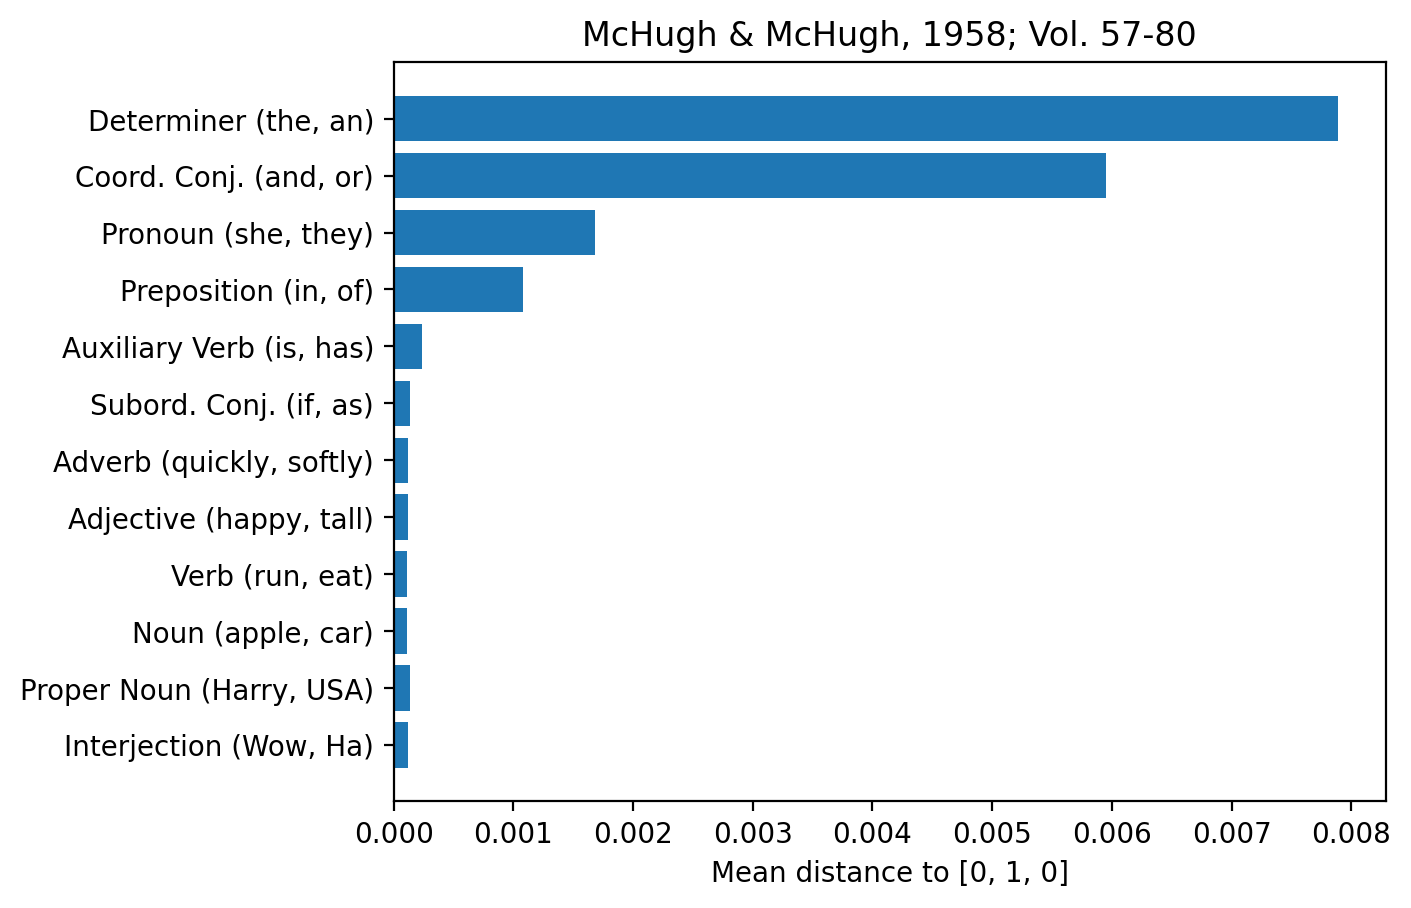

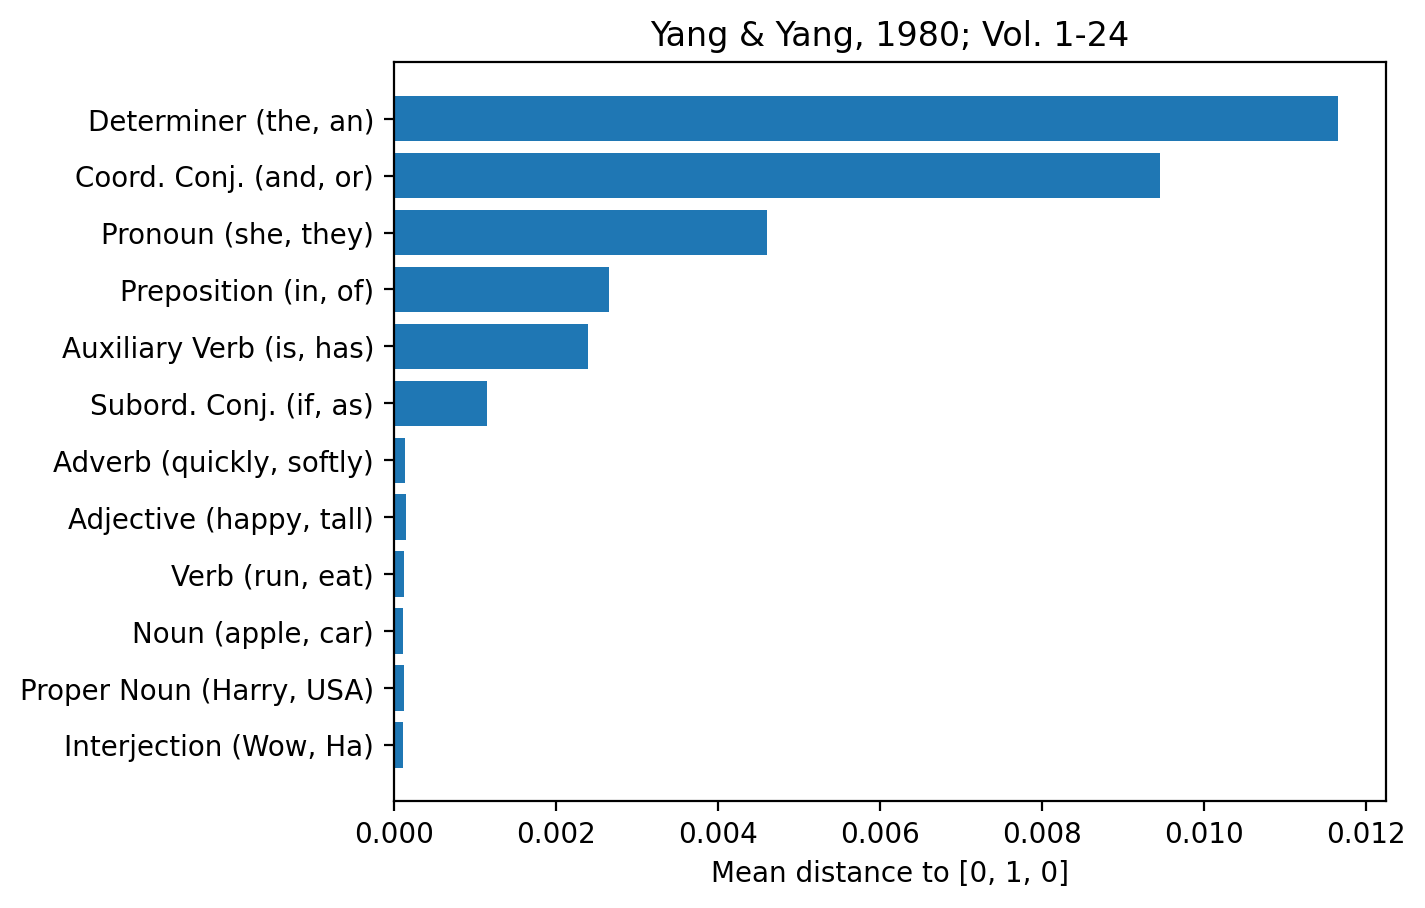

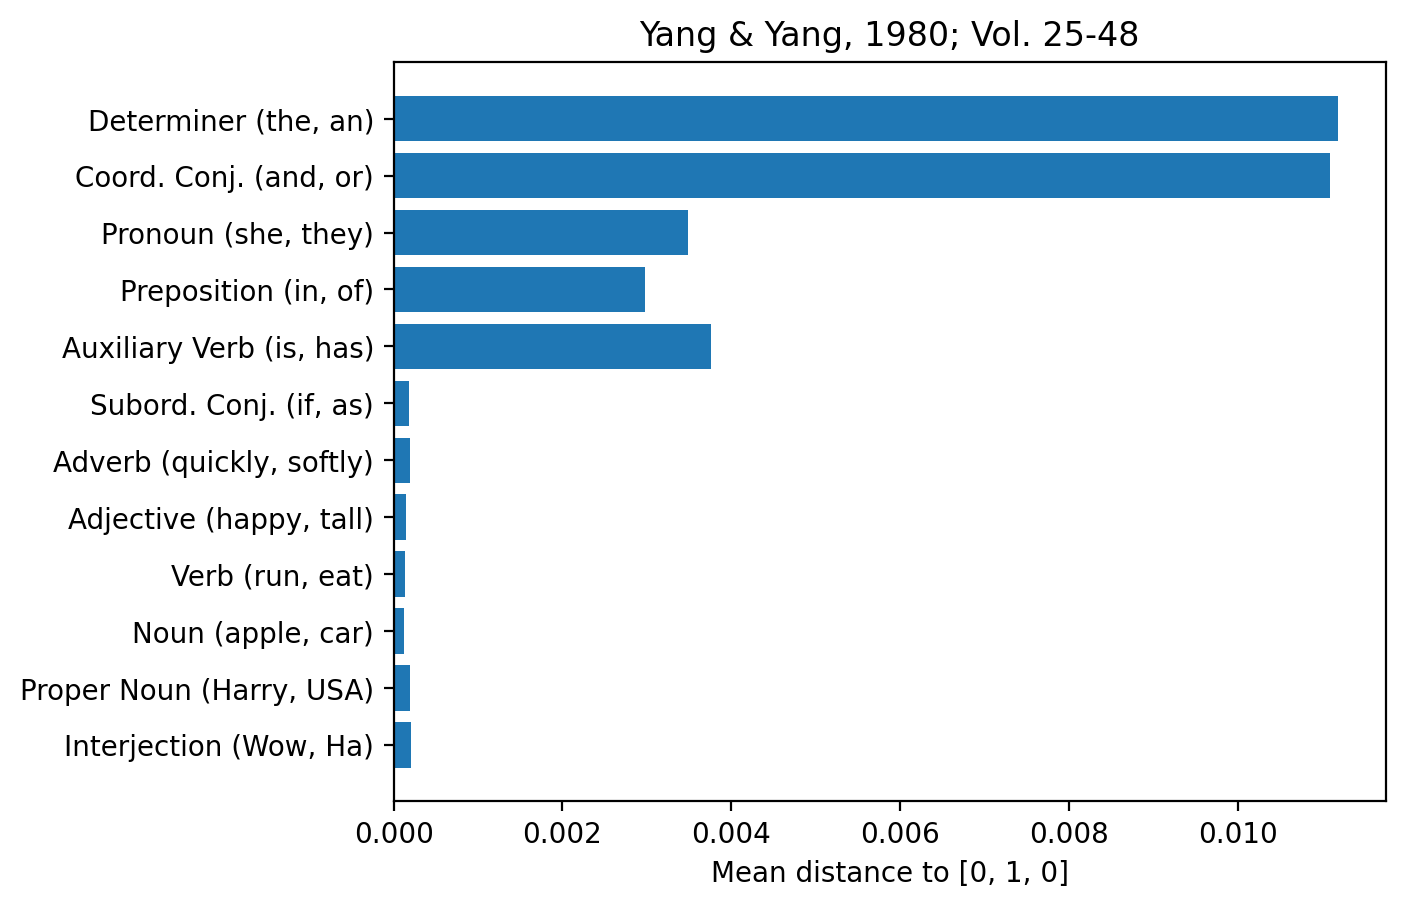

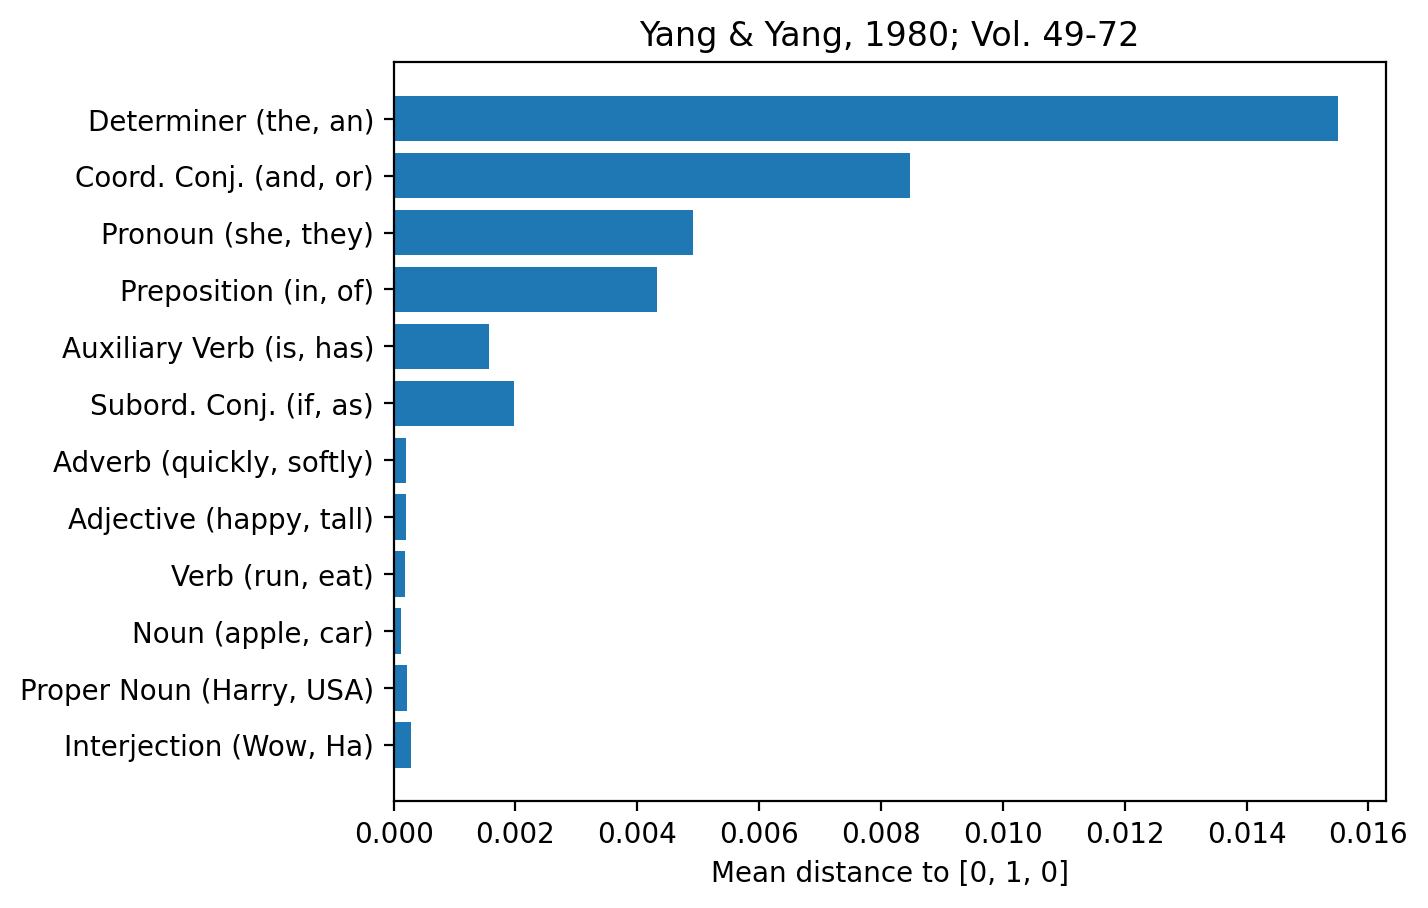

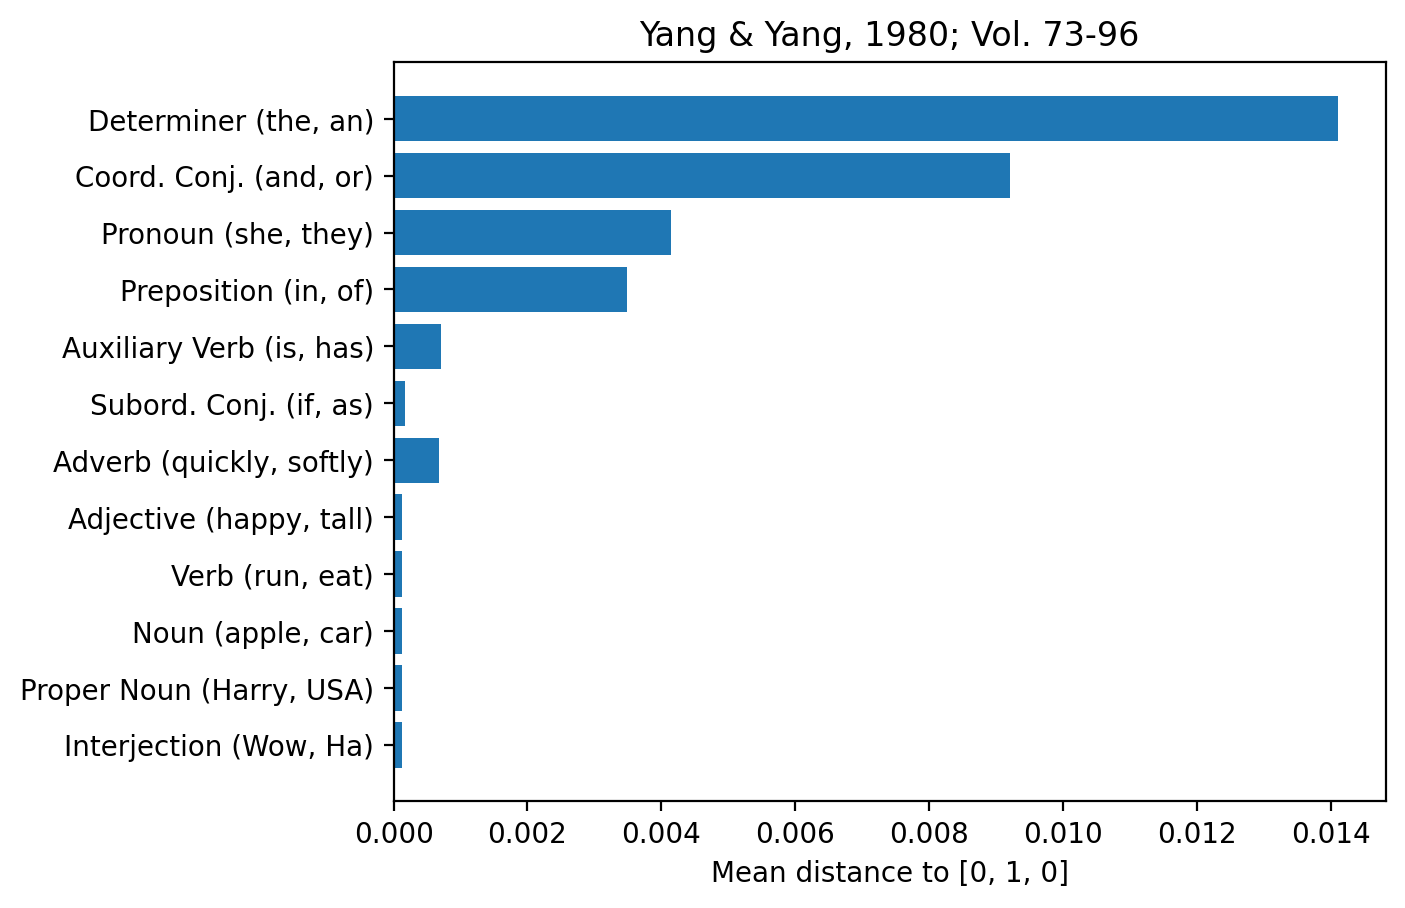

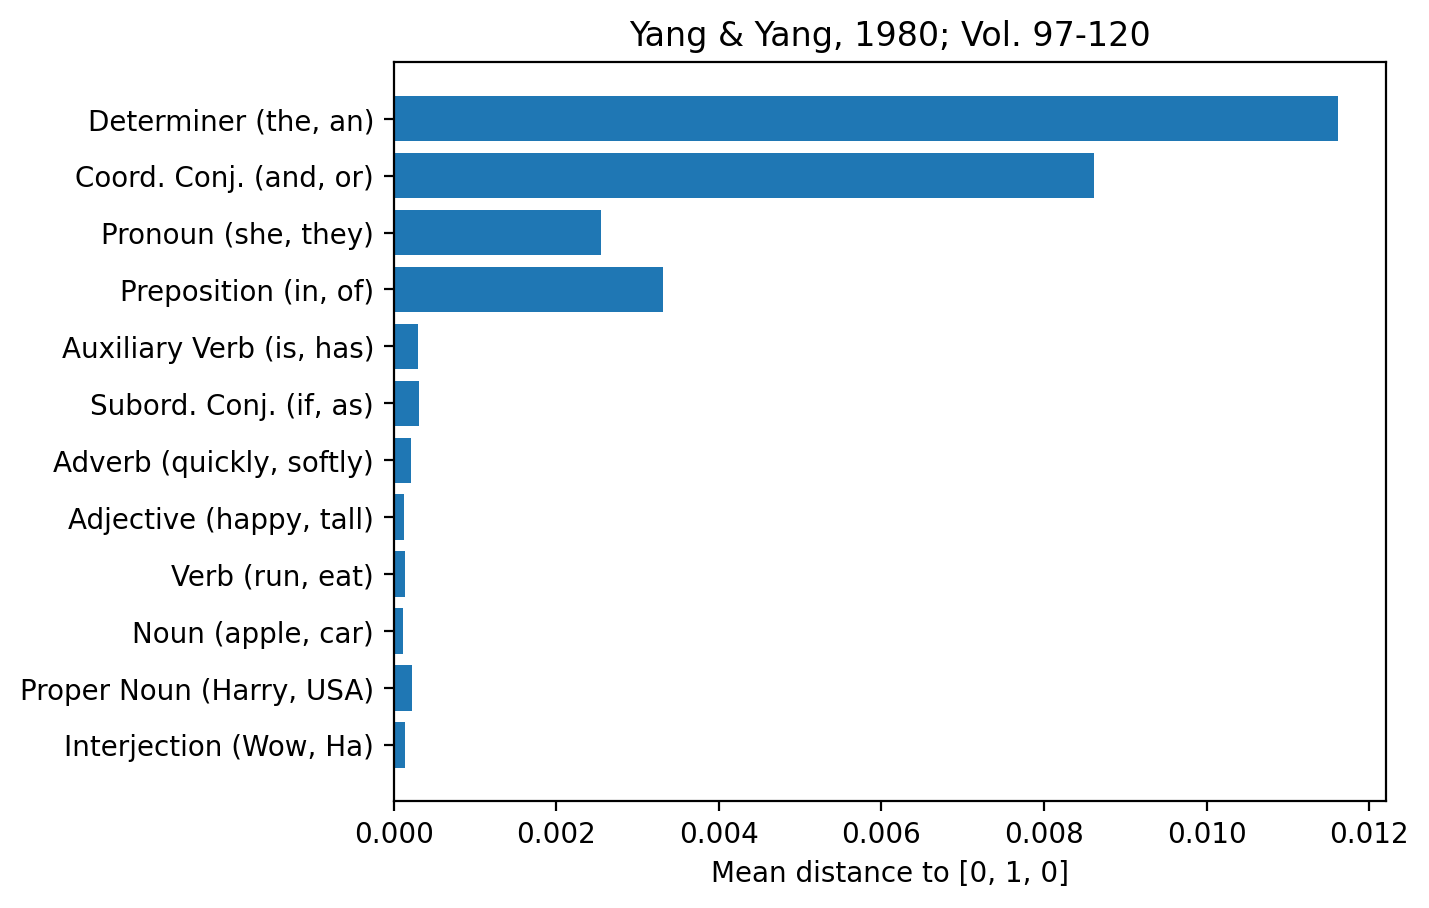

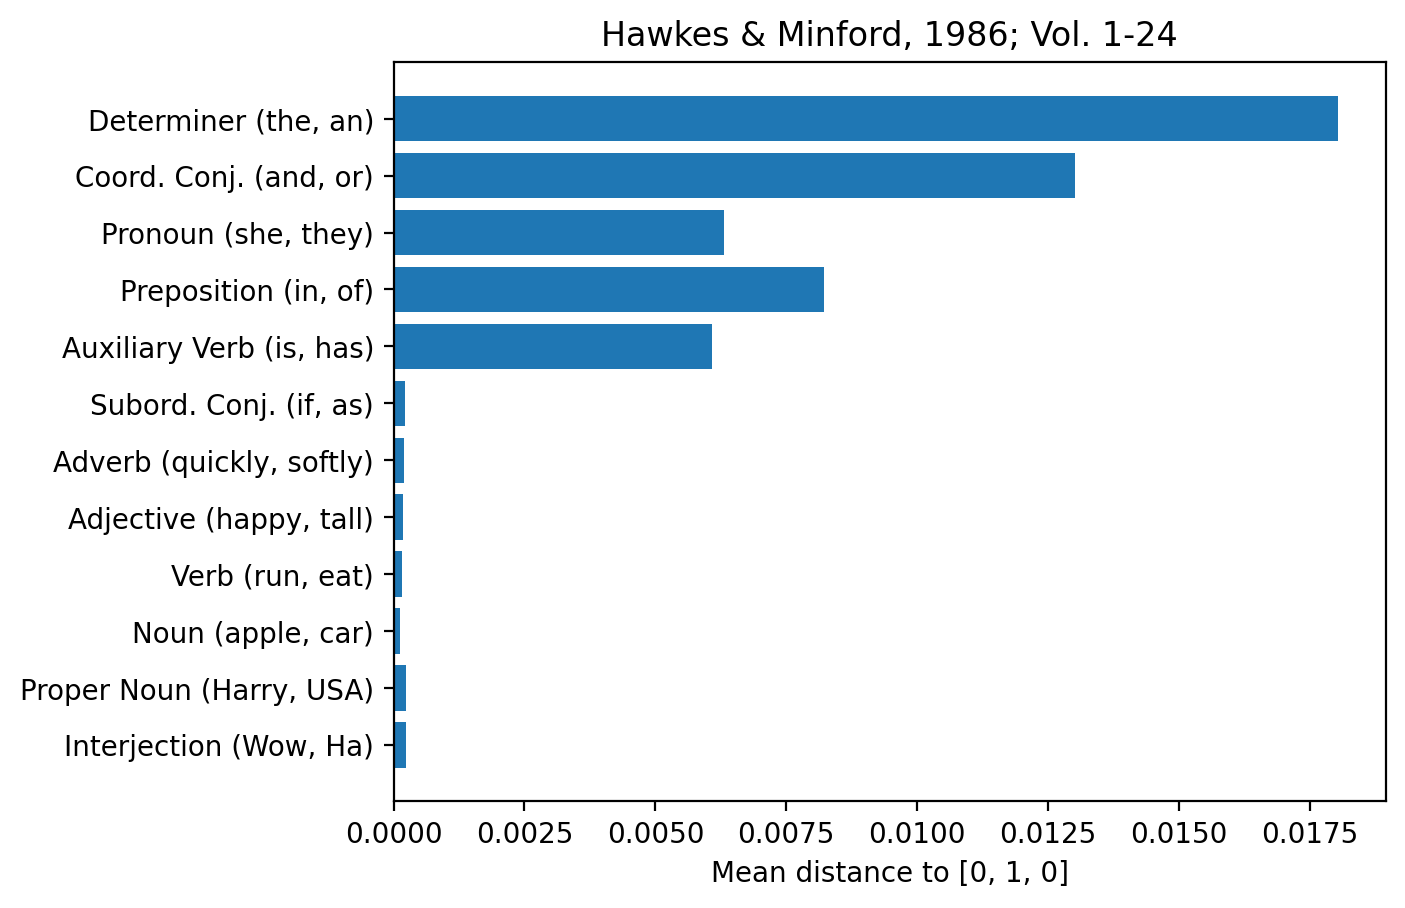

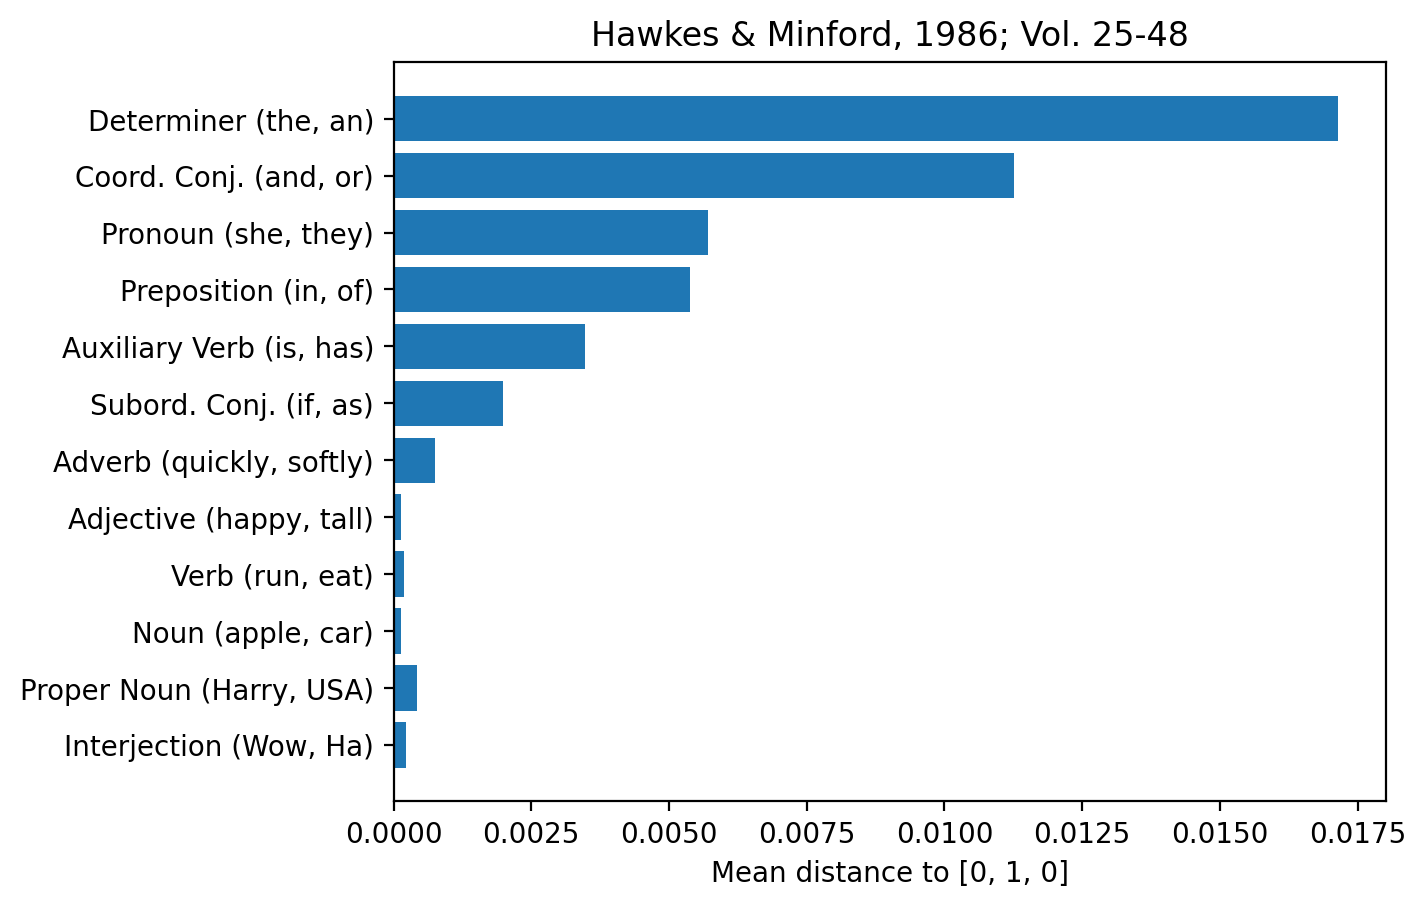

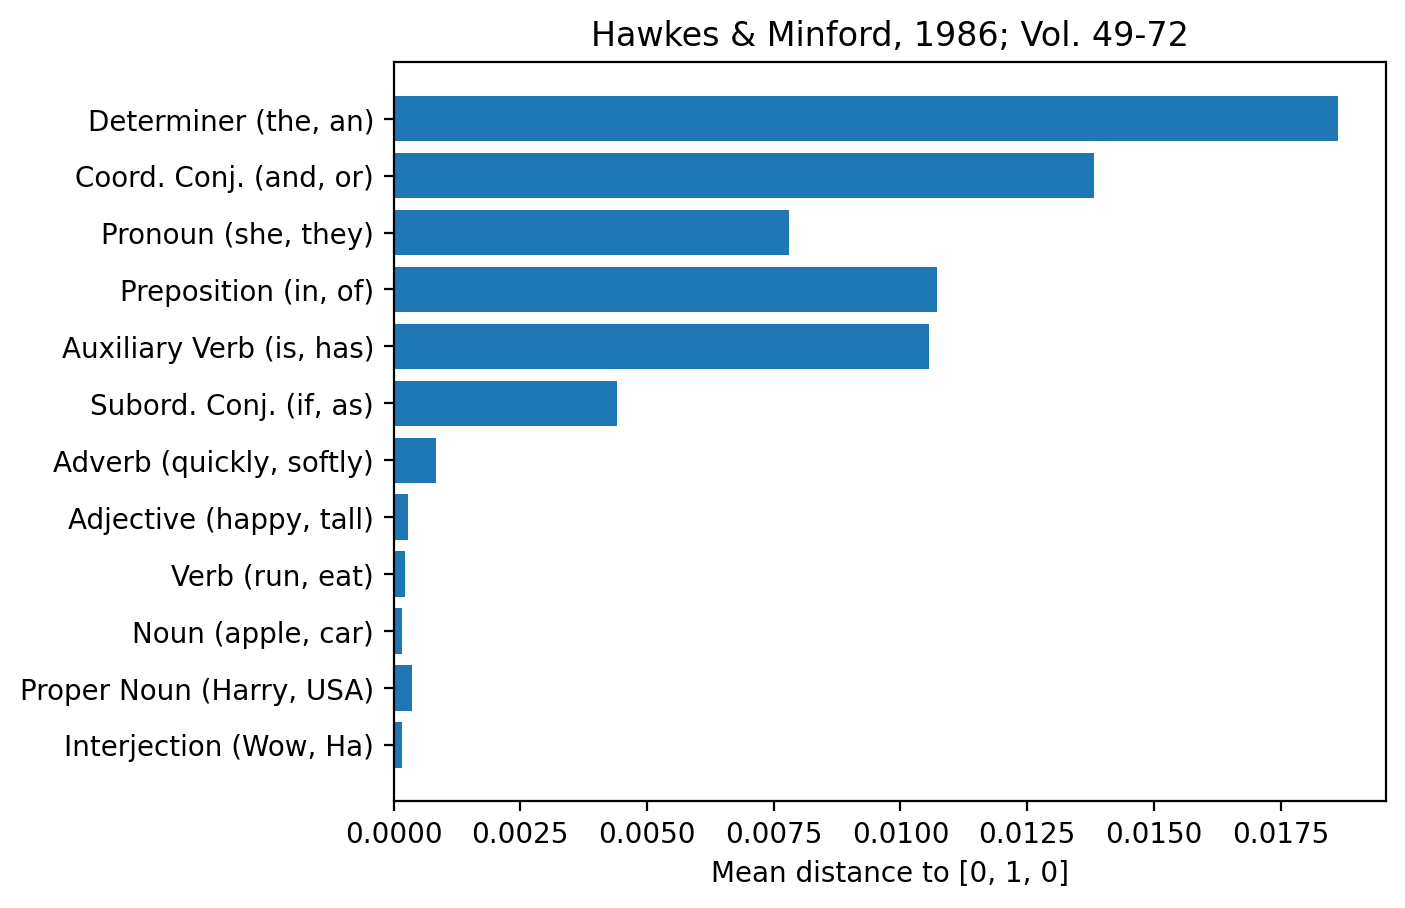

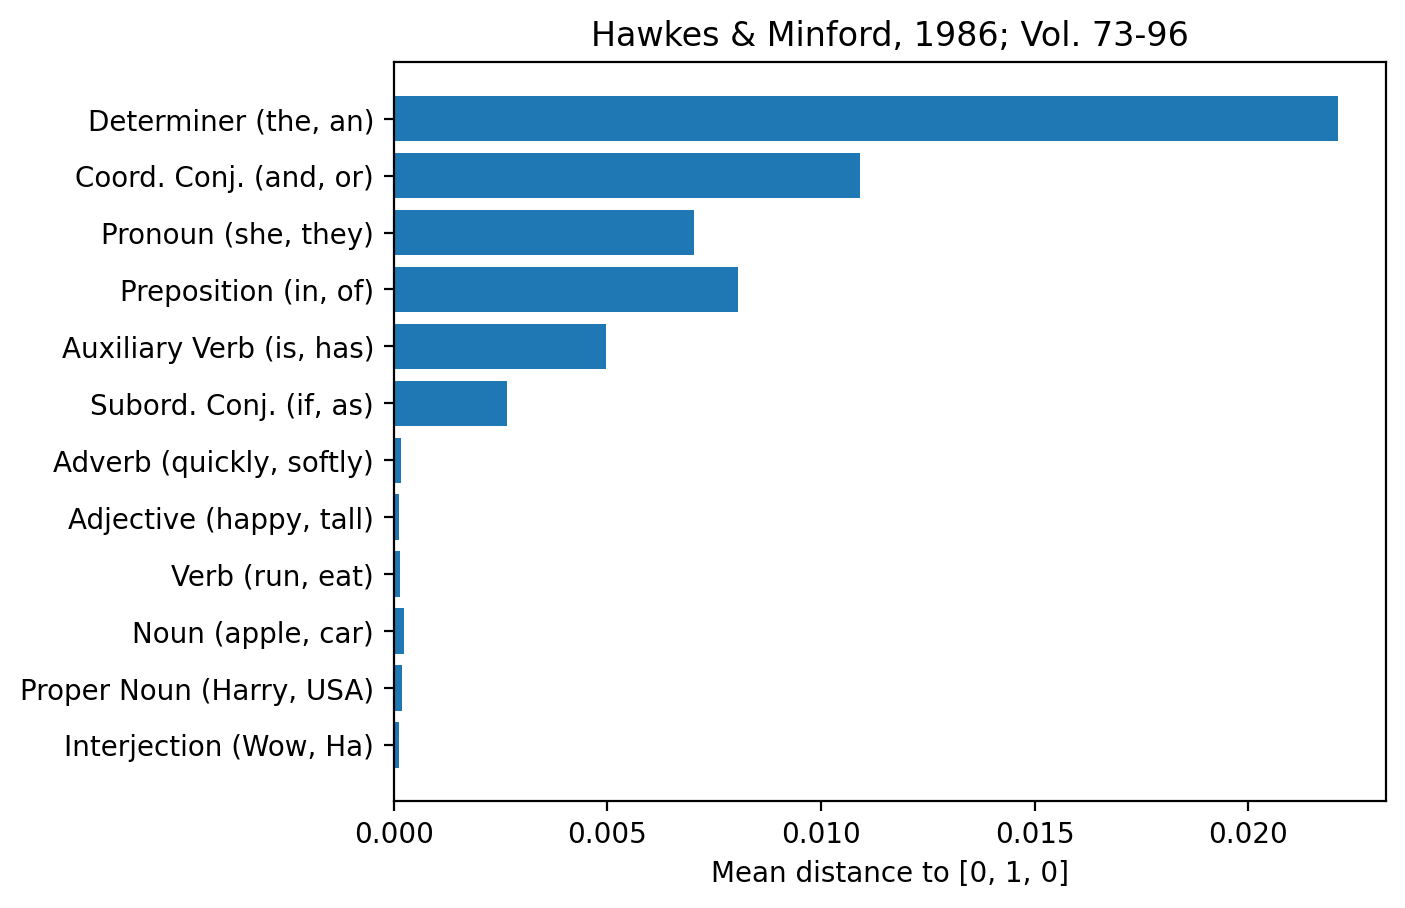

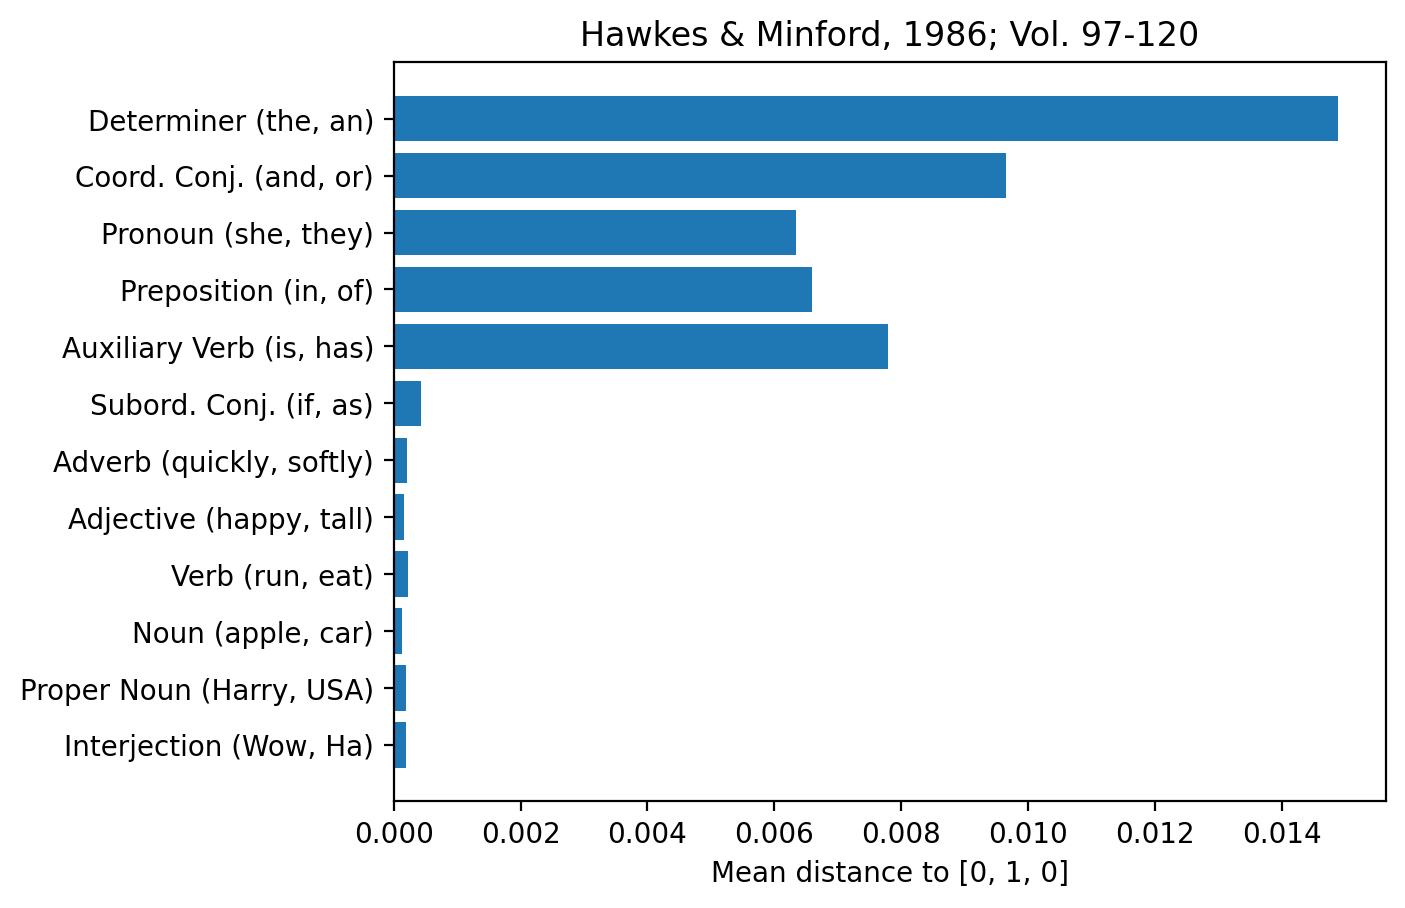

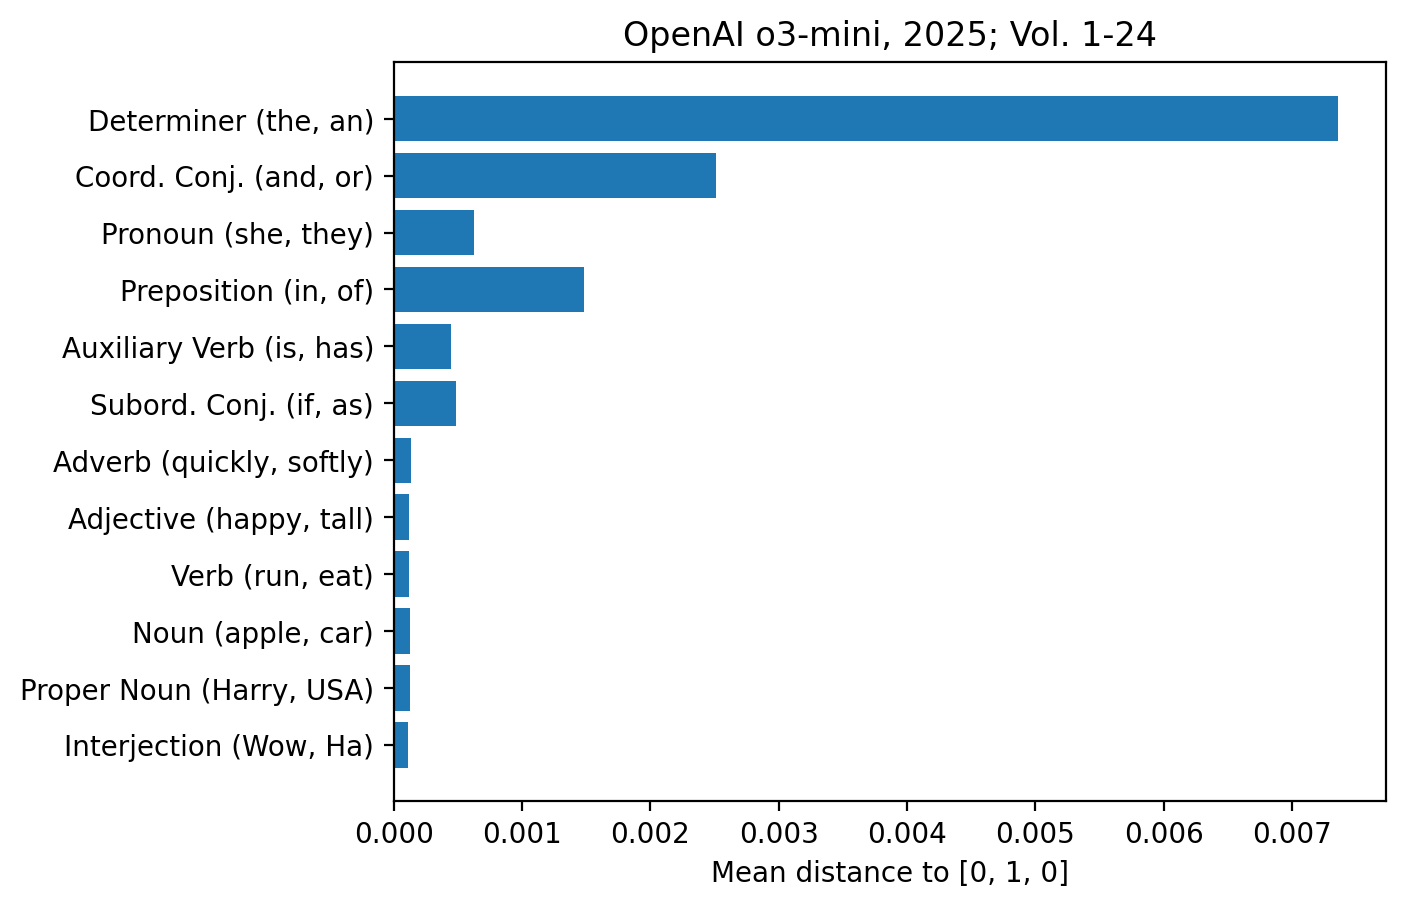

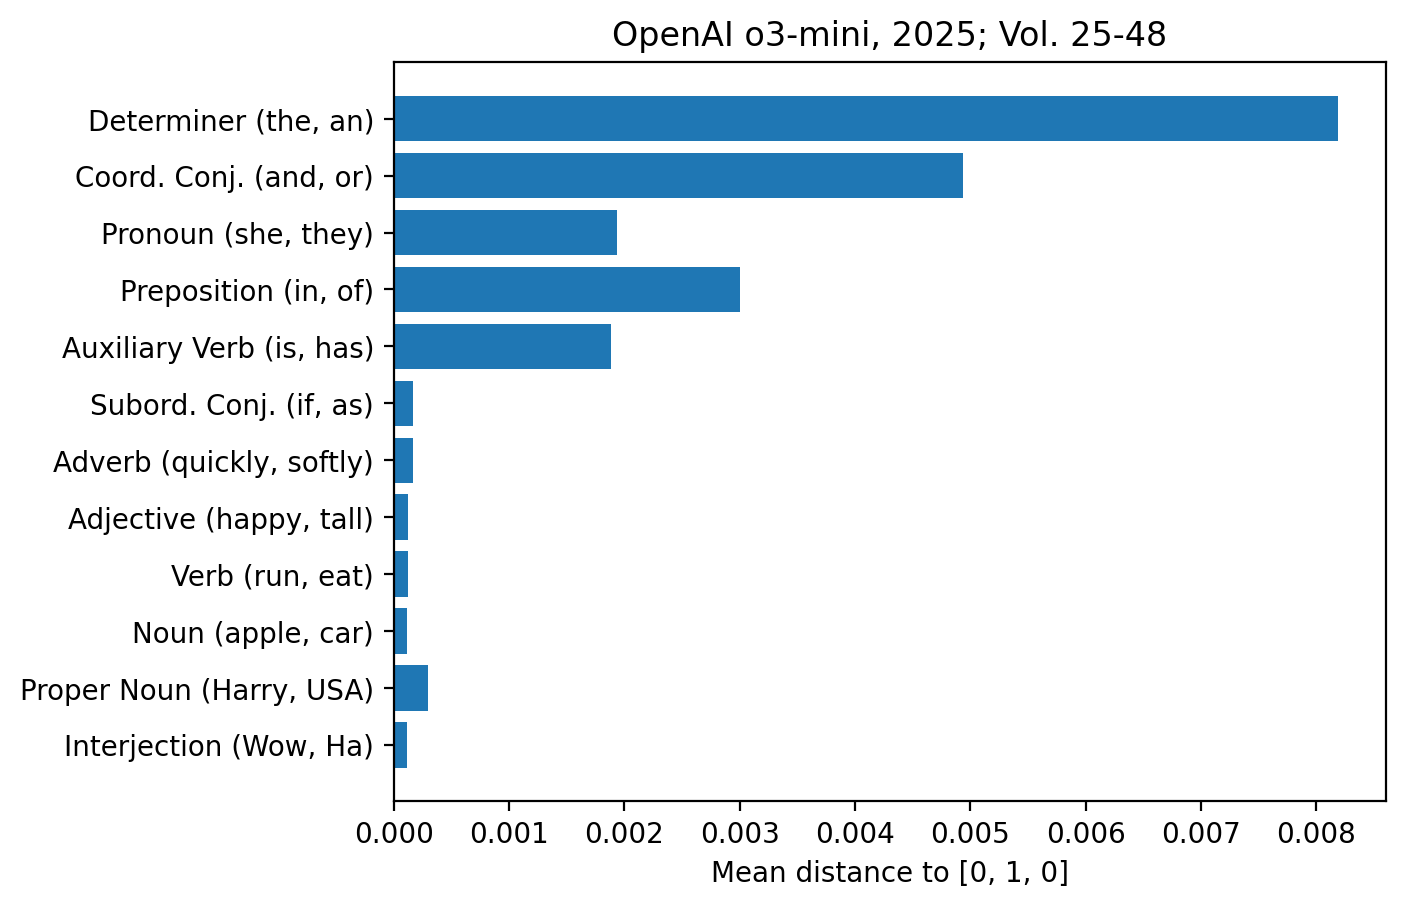

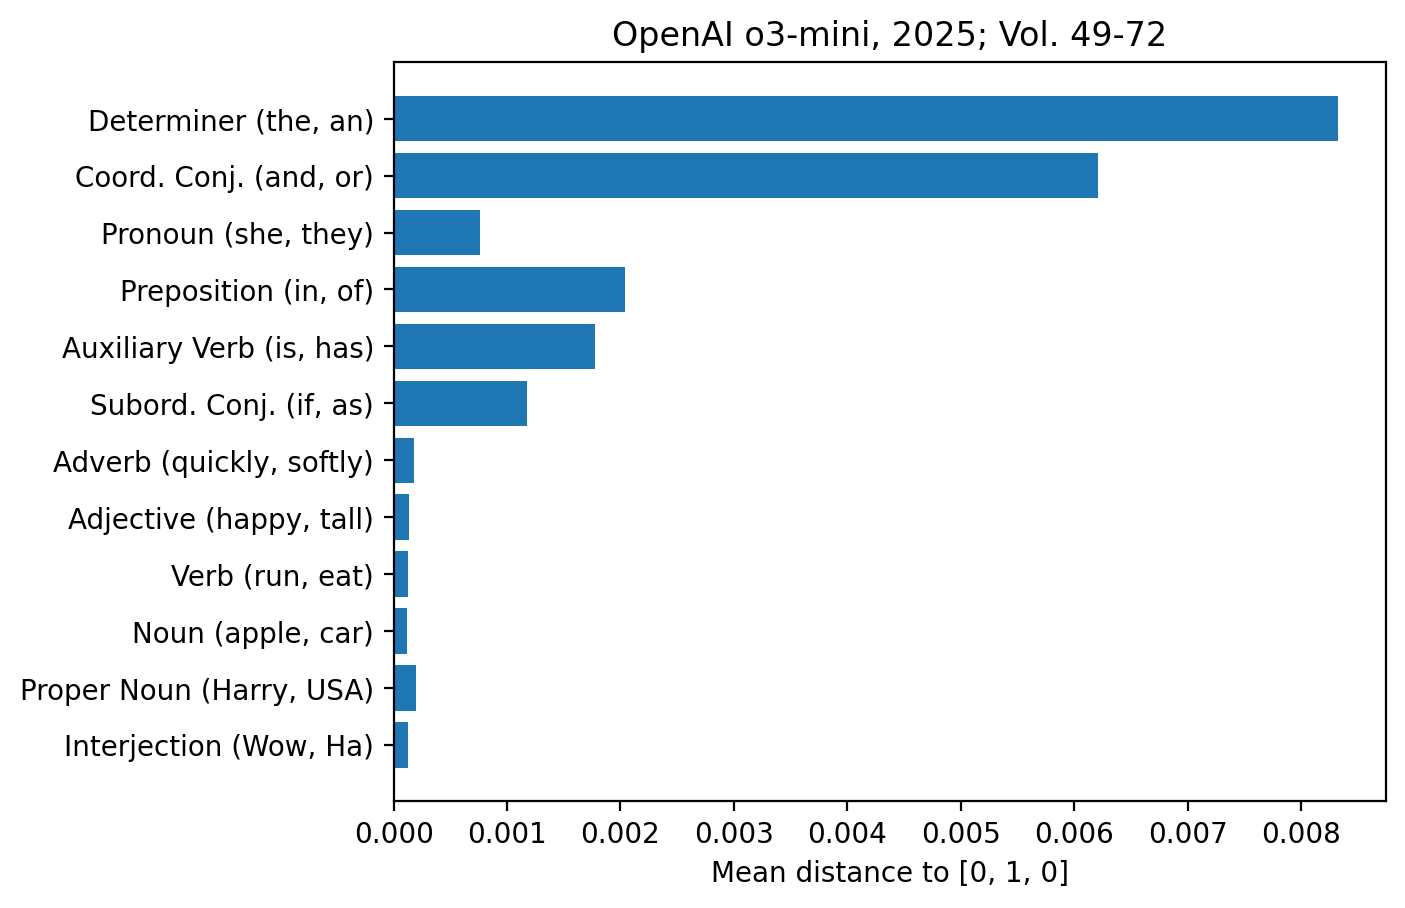

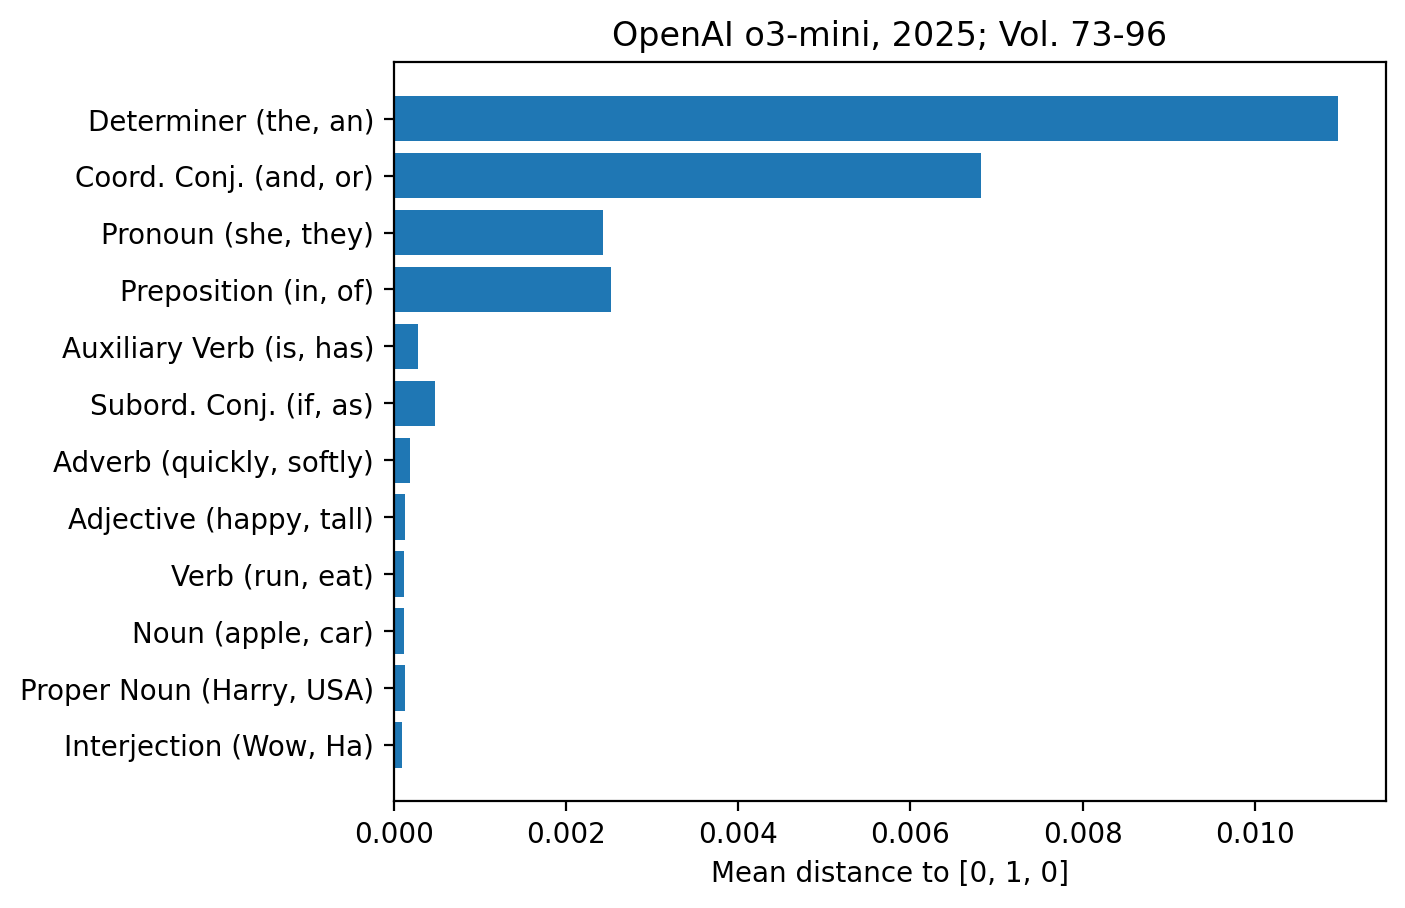

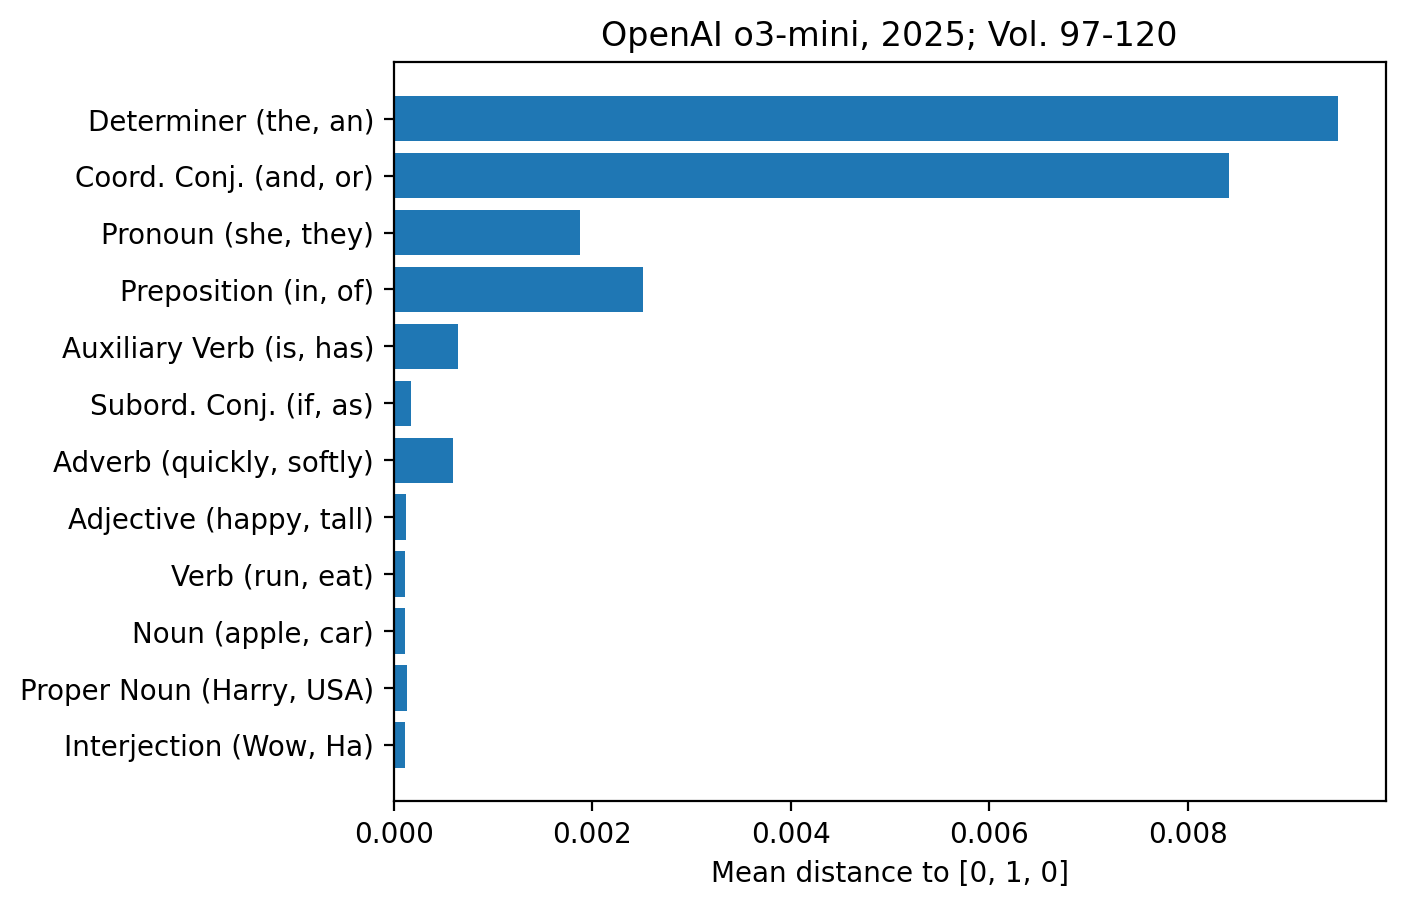

In [4]:
for book in books:
    plt.figure(dpi=200)
    plt.barh(classes.values(), [pos_dist_dict_book[book][k] for k in classes.keys()])
    plt.title(books[book])
    plt.xlabel("Mean distance to [0, 1, 0]")
    plt.savefig(f"results/figs/hongloumeng/{book}.pdf", bbox_inches="tight", pad_inches=0.05)
    plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.manifold import TSNE
import matplotlib.lines as mlines

In [6]:
X = np.array([[pos_dist_dict_book[book][k] for k in classes.keys()] for book in books])
label_true = np.array([0, 0,
                       1,
                       2, 2, 2, 2, 2,
                       3, 3, 3, 3, 3,
                       4, 4, 4, 4, 4])

# Initialize and fit KMeans
labels_pred = []
scores = []
for i in range(100):
    model = KMeans(n_clusters=5,
                   init='k-means++',
                   random_state=i)
    model.fit(X)
    labels_pred.append(model.labels_)
    scores.append(v_measure_score(label_true, model.labels_))
scores = np.array(scores)
print(scores.max())
print(scores.min())

0.9208665755243529
0.6101113426085554


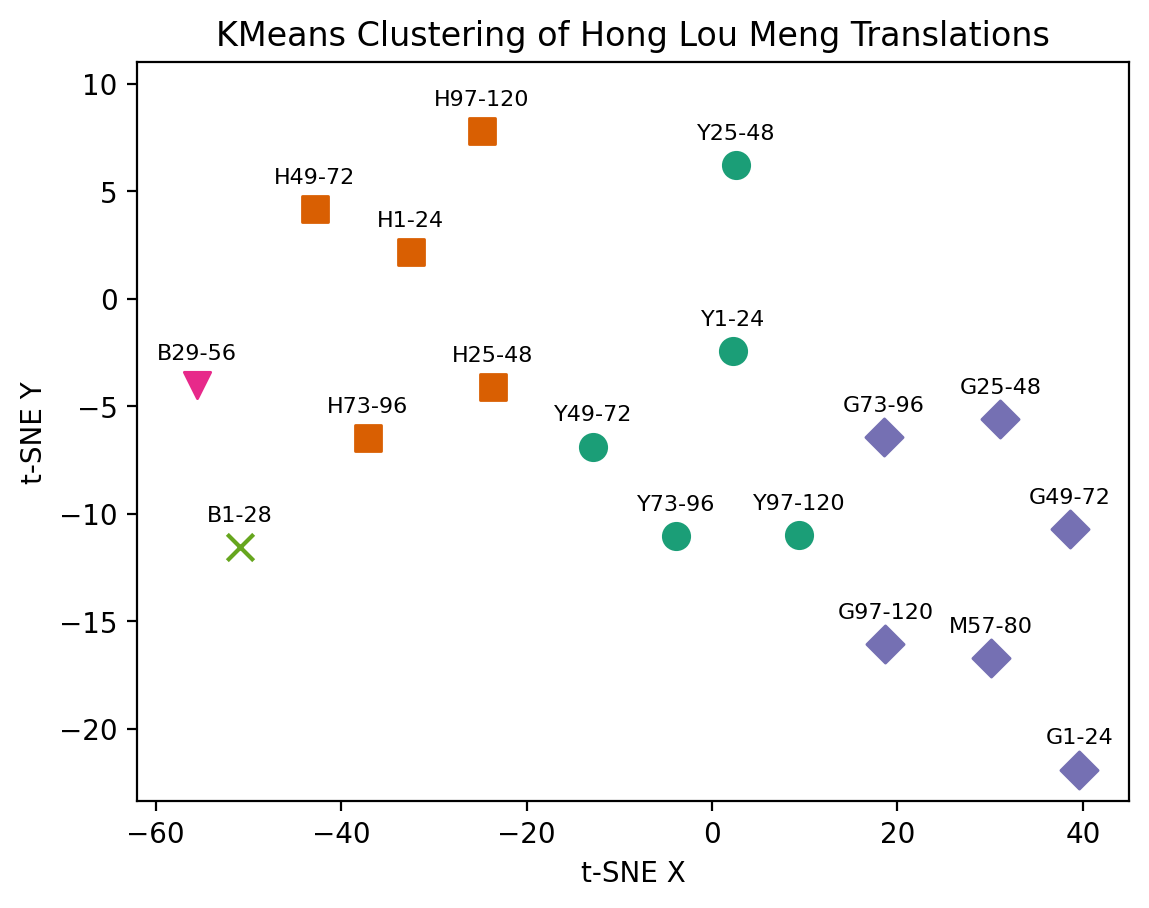

In [7]:
# Show best
labels_pred_show = labels_pred[np.argmax(scores)]

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=7)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=200)
shapes = ['o', 's', 'D', 'v', 'x', "p", "P"]
for i, label in enumerate(labels_pred_show):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label)],
                s=90, marker=shapes[label])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 1,
             list(books.keys())[i][6:].replace("_", "-").replace("F", "M"),
             ha="center", va="bottom", fontsize=8)

plt.title("KMeans Clustering of Hong Lou Meng Translations")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.xlim(-62, 45)
plt.ylim(None, 11)
plt.savefig(f"results/figs/hongloumeng/kmeans.pdf", bbox_inches="tight", pad_inches=0.05)

In [8]:
X = np.array([[pos_dist_dict_book[book][k] for k in classes.keys()] for book in books if "G" not in book])
label_true = np.array([0, 0,
                       1,
                       2, 2, 2, 2, 2,
                       3, 3, 3, 3, 3])

# Initialize and fit KMeans
labels_pred = []
scores = []
for i in range(100):
    model = KMeans(n_clusters=4,
                   init='k-means++',
                   random_state=i)
    model.fit(X)
    labels_pred.append(model.labels_)
    scores.append(v_measure_score(label_true, model.labels_))
scores = np.array(scores)
print(scores.max())
print(scores.min())

1.0
0.648516168644331


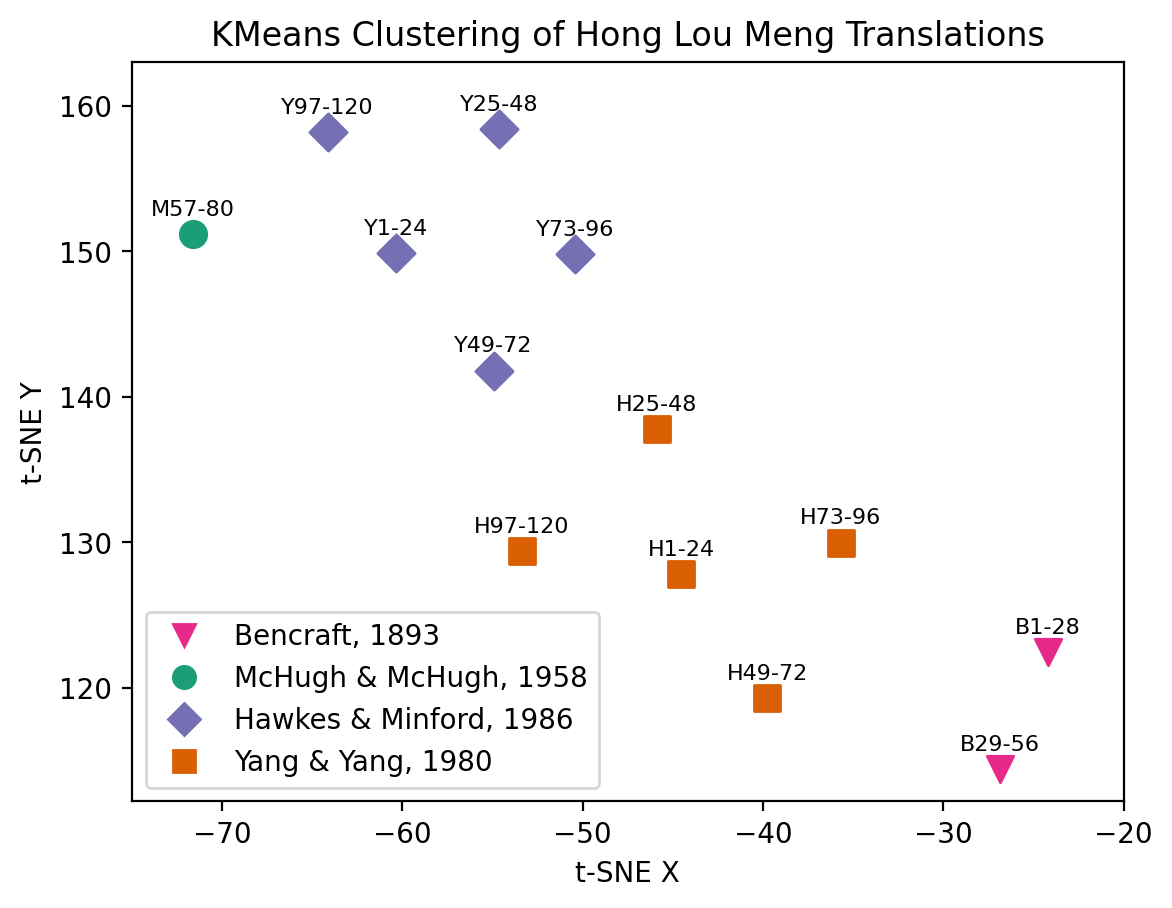

In [9]:
# Show best
labels_pred_show = labels_pred[np.argmax(scores)]

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=7)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=200)
shapes = ['o', 's', 'D', 'v', 'x', "p", "P"]
for i, label in enumerate(labels_pred_show):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label)],
                s=90, marker=shapes[label])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 1,
             list(books.keys())[i][6:].replace("_", "-").replace("F", "M"),
             ha="center", va="bottom", fontsize=8)

# Create legend manually
legend_labels = {
    "Bencraft, 1893": 0,
    "McHugh & McHugh, 1958": 2,
    "Hawkes & Minford, 1986": 3,
    "Yang & Yang, 1980": 8,
}
legend_handles = [mlines.Line2D([], [],
                                color=plt.cm.Dark2(labels_pred_show[index]),
                                marker=shapes[labels_pred_show[index]], linestyle='None',
                                markersize=8, label=text)
                  for text, index in legend_labels.items()]
plt.legend(handles=legend_handles, loc="lower left")

plt.title("KMeans Clustering of Hong Lou Meng Translations")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.xlim(-75, -20)
plt.ylim(None, 163)
plt.savefig(f"results/figs/hongloumeng/kmeans_no_gpt.pdf", bbox_inches="tight", pad_inches=0.05)